## 1.0 Collecting the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf

In [2]:
now = datetime.now()
start = datetime(now.year - 10, now.month, now.day)
end = now
ticker = 'AMZN'
df = yf.download(ticker, start, end)
df

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2015-05-18,21.261999,21.363501,21.073000,21.299999,47804000
2015-05-19,21.085501,21.412001,21.031500,21.243500,49284000
2015-05-20,21.193001,21.355000,20.917999,21.030001,43924000
2015-05-21,21.581499,21.844999,21.400000,21.400000,82428000
2015-05-22,21.381500,21.622000,21.380501,21.577499,40412000
...,...,...,...,...,...
2025-05-09,193.059998,194.690002,191.160004,193.380005,29663100
2025-05-12,208.639999,211.660004,205.750000,210.710007,75205000


## 2.0 Data Exploration

In [3]:
df.shape

(2515, 5)

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.isna().sum()

Price   Ticker
Close   AMZN      0
High    AMZN      0
Low     AMZN      0
Open    AMZN      0
Volume  AMZN      0
dtype: int64

In [6]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2025-05-09,193.059998,194.690002,191.160004,193.380005,29663100
2025-05-12,208.639999,211.660004,205.750000,210.710007,75205000
2025-05-13,211.369995,214.839996,210.100006,211.080002,56193700
2025-05-14,210.250000,211.929993,208.850006,211.449997,38492100
2025-05-15,205.169998,206.880005,202.669998,206.449997,64290800


In [7]:
df.dtypes

Price   Ticker
Close   AMZN      float64
High    AMZN      float64
Low     AMZN      float64
Open    AMZN      float64
Volume  AMZN        int64
dtype: object

In [8]:
df = df.reset_index()
df

Price,Date,Close,High,Low,Open,Volume
Ticker,,AMZN,AMZN,AMZN,AMZN,AMZN
0,2015-05-18,21.261999,21.363501,21.073000,21.299999,47804000
1,2015-05-19,21.085501,21.412001,21.031500,21.243500,49284000
2,2015-05-20,21.193001,21.355000,20.917999,21.030001,43924000
3,2015-05-21,21.581499,21.844999,21.400000,21.400000,82428000
4,2015-05-22,21.381500,21.622000,21.380501,21.577499,40412000
...,...,...,...,...,...,...
2510,2025-05-09,193.059998,194.690002,191.160004,193.380005,29663100
2511,2025-05-12,208.639999,211.660004,205.750000,210.710007,75205000
2512,2025-05-13,211.369995,214.839996,210.100006,211.080002,56193700


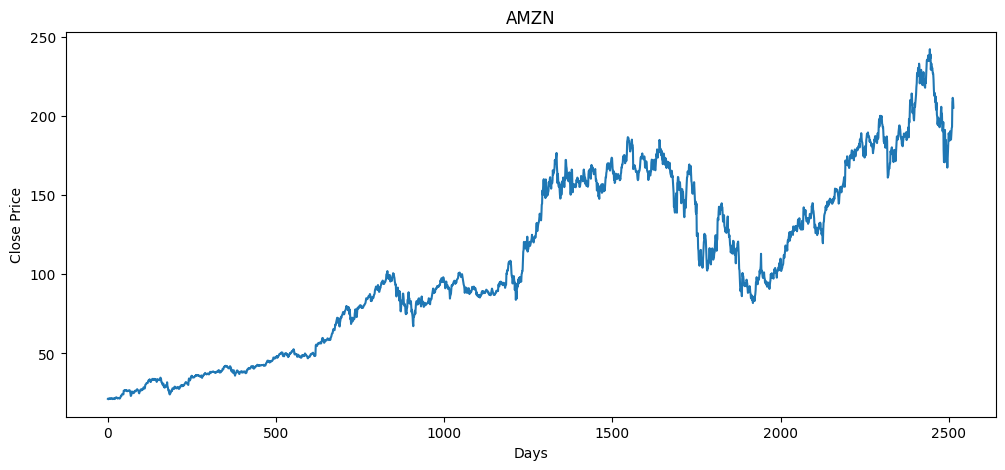

In [9]:
plt.figure(figsize=(12, 5))
plt.title(ticker)
plt.ylabel('Close Price')
plt.xlabel('Days')
plt.plot(df.Close)

## 3.0 Feature Engineering

### Calculation 100 moving average

In [10]:
df['100 MA'] = df.Close.rolling(100).mean()
df

Price,Date,Close,High,Low,Open,Volume,100 MA
Ticker,,AMZN,AMZN,AMZN,AMZN,AMZN,
0,2015-05-18,21.261999,21.363501,21.073000,21.299999,47804000,NaN
1,2015-05-19,21.085501,21.412001,21.031500,21.243500,49284000,NaN
2,2015-05-20,21.193001,21.355000,20.917999,21.030001,43924000,NaN
3,2015-05-21,21.581499,21.844999,21.400000,21.400000,82428000,NaN
4,2015-05-22,21.381500,21.622000,21.380501,21.577499,40412000,NaN
...,...,...,...,...,...,...,...
2510,2025-05-09,193.059998,194.690002,191.160004,193.380005,29663100,208.5689
2511,2025-05-12,208.639999,211.660004,205.750000,210.710007,75205000,208.3807
2512,2025-05-13,211.369995,214.839996,210.100006,211.080002,56193700,208.1651


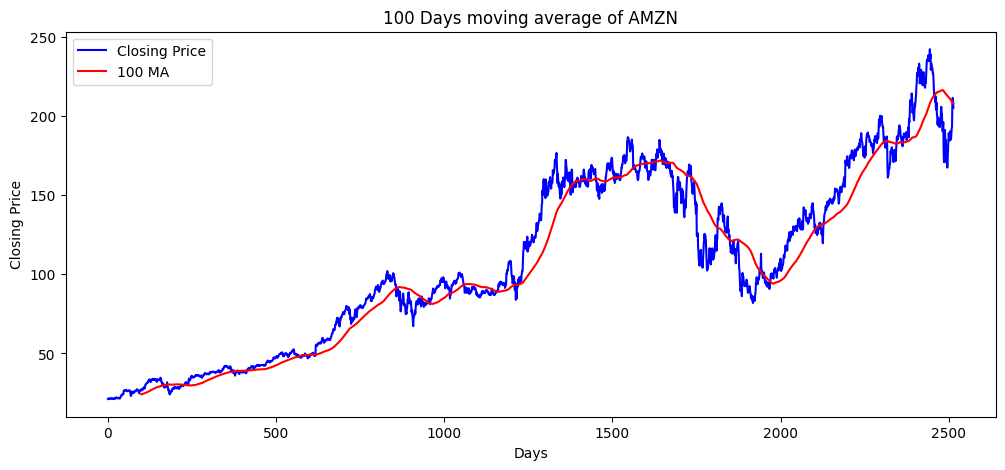

In [11]:
plt.figure(figsize = (12, 5))
plt.plot(df.Close, 'b', label='Closing Price')
plt.plot(df['100 MA'], 'r', label = '100 MA')
plt.title(f"100 Days moving average of {ticker}")
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend()

### Calculating 200 days moving average

In [12]:
df['200 MA'] = df.Close.rolling(200).mean()
df

Price,Date,Close,High,Low,Open,Volume,100 MA,200 MA
Ticker,,AMZN,AMZN,AMZN,AMZN,AMZN,,
0,2015-05-18,21.261999,21.363501,21.073000,21.299999,47804000,NaN,NaN
1,2015-05-19,21.085501,21.412001,21.031500,21.243500,49284000,NaN,NaN
2,2015-05-20,21.193001,21.355000,20.917999,21.030001,43924000,NaN,NaN
3,2015-05-21,21.581499,21.844999,21.400000,21.400000,82428000,NaN,NaN
4,2015-05-22,21.381500,21.622000,21.380501,21.577499,40412000,NaN,NaN
...,...,...,...,...,...,...,...,...
2510,2025-05-09,193.059998,194.690002,191.160004,193.380005,29663100,208.5689,199.14730
2511,2025-05-12,208.639999,211.660004,205.750000,210.710007,75205000,208.3807,199.28635
2512,2025-05-13,211.369995,214.839996,210.100006,211.080002,56193700,208.1651,199.44395


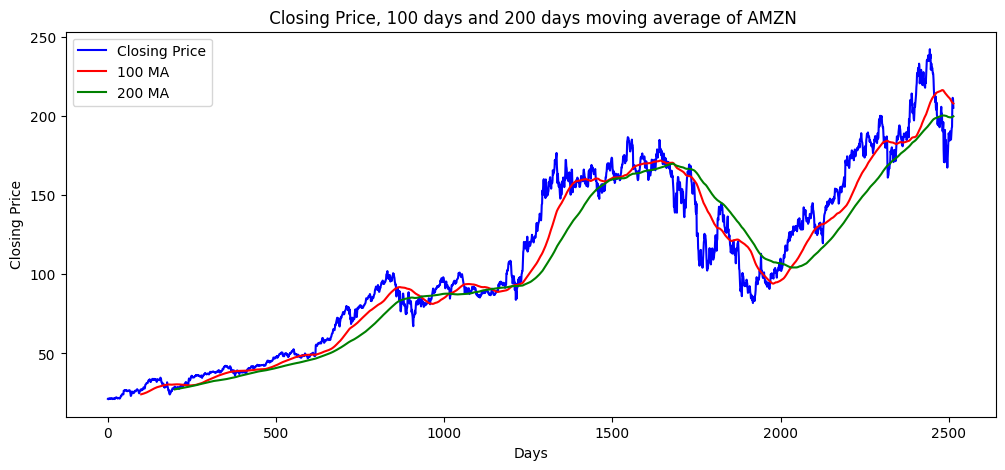

In [13]:
plt.figure(figsize = (12, 5))
plt.plot(df.Close, 'b', label='Closing Price')
plt.plot(df['100 MA'], 'r', label='100 MA')
plt.plot(df['200 MA'], 'g', label='200 MA')
plt.title(f" Closing Price, 100 days and 200 days moving average of {ticker}")
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend()

### Calculating percentage changed for the closing prices

In [14]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close', 'Percentage Changed']]

Price,Close,Percentage Changed
Ticker,AMZN,
0,21.261999,NaN
1,21.085501,-0.008301
2,21.193001,0.005098
3,21.581499,0.018331
4,21.381500,-0.009267
...,...,...
2510,193.059998,0.005102
2511,208.639999,0.080700
2512,211.369995,0.013085


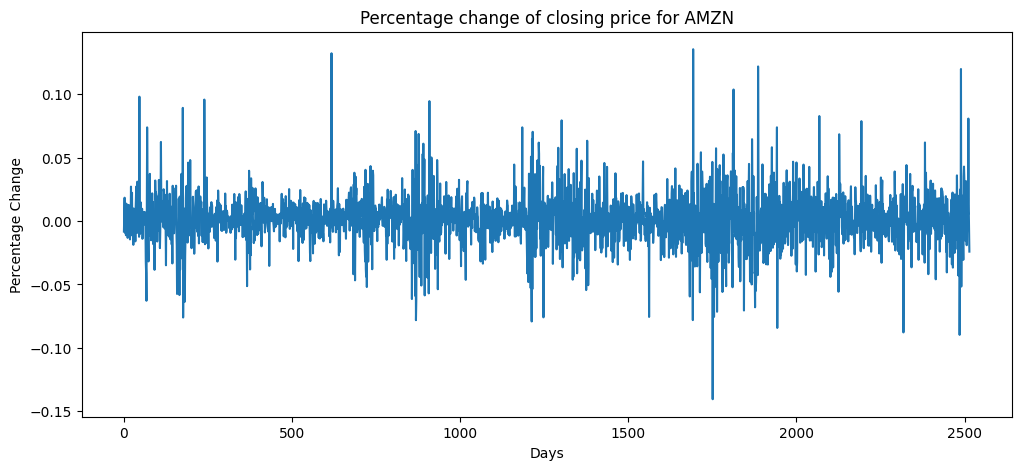

In [15]:
plt.figure(figsize=(12, 5))
plt.xlabel('Days')
plt.title(f'Percentage change of closing price for {ticker}')
plt.ylabel('Percentage Change')
plt.plot(df['Percentage Changed'])

## 4.0 Data Preprocessing

### Splitting data into 3: train, validation, test data

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
df_fulltrain, df_test = train_test_split(df, test_size = 0.2, shuffle = False)
df_train, df_val = train_test_split(df_fulltrain, test_size = 0.2 * 100/80, shuffle=False)

In [18]:
len(df_train) + len(df_val) + len(df_test) == len(df)

True

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_train = df_train.Close
data_train_arr = scaler.fit_transform(data_train)
data_train_arr

array([[1.13513297e-03],
       [0.00000000e+00],
       [6.91376646e-04],
       ...,
       [9.01104275e-01],
       [8.77960890e-01],
       [8.81025464e-01]])

## 5.0 Sequence Creation

In [20]:
X_train, y_train  = [], []
seq_num = 100
for i in range(seq_num, len(data_train_arr)):
    X_train.append(data_train_arr[i-100 : i])
    y_train.append(data_train_arr[i, 0])

In [21]:
X_train, y_train = np.array(X_train), np.array(y_train)

## 6.0 Building the Model

In [22]:
import tensorflow as tf
print(tf.__version__)

2025-05-16 11:01:39.958892: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-16 11:01:39.962081: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-16 11:01:39.971839: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747389699.988136    6148 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747389699.992921    6148 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747389700.004926    6148 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

2.19.0


In [23]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense

In [24]:
model = Sequential()
model.add(Input(shape=(seq_num, 1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

2025-05-16 11:01:41.571039: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


## 7.0 Train the Model

In [25]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0251
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 7.7732e-04
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 6.4723e-04
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 7.1764e-04
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 8.2605e-04
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 7.2164e-04
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 5.3407e-04
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0024
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 6.3092e-04
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 4.3308e-04
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 8.8935e-04
Epoch 12/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 4.6624e-04
Epoch 13/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 4.1991e-04
Epoch 14/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - loss: 4.5295e-04
Epoch 15/50
45/45 ━━━━━

## 8.0 Validate the model

In [26]:
data_val = df_val.Close
data_val_arr = scaler.transform(data_val)
X_val, y_val  = [], []
for i in range(seq_num, len(data_val_arr)):
    X_val.append(data_val_arr[i-100 : i])
    y_val.append(data_val_arr[i, 0])
X_val, y_val = np.array(X_val), np.array(y_val)

In [27]:
y_val_predict = model.predict(X_val)
y_val_predict = scaler.inverse_transform(y_val_predict).flatten()
y_val = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


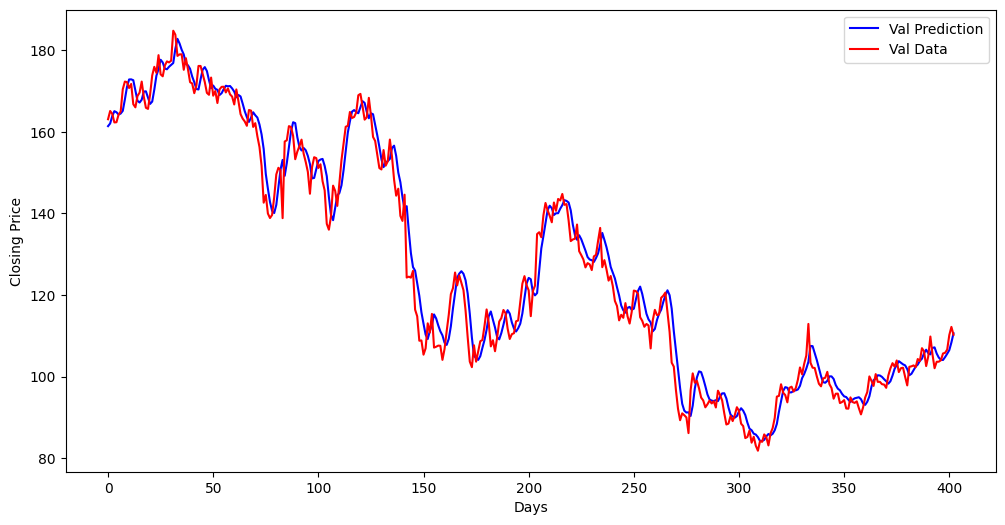

In [28]:
plt.figure(figsize = (12, 6))
plt.plot(y_val_predict, 'b', label='Val Prediction')
plt.plot(y_val, 'r', label= 'Val Data')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend()

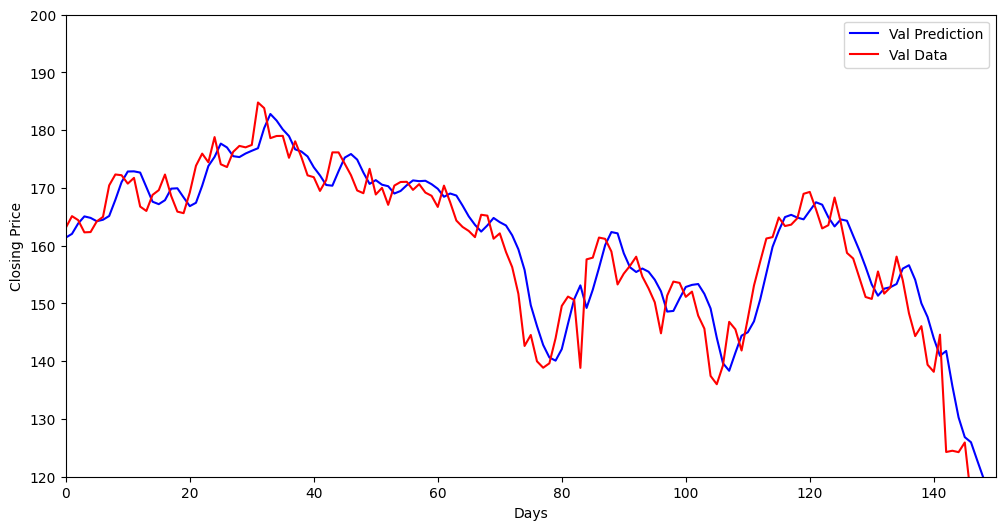

In [29]:
plt.figure(figsize = (12, 6))
plt.plot(y_val_predict, 'b', label='Val Prediction')
plt.plot(y_val, 'r', label= 'Val Data')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.xlim(0, 150)
plt.ylim(120, 200)
plt.legend()

## 9.0 Model Evaluation

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_val, y_val_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_val_predict)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE)", rmse)
print("R-Squared (R2): ", r2)

Mean Squared Error (MSE):  19.28819952441958
Root Mean Squared Error (RMSE) 4.391833276027174
R-Squared (R2):  0.9771328200976923


## 10. Combining Training and Validation data to retrain the model

In [31]:
data_fulltrain = df_fulltrain.Close

In [32]:
data_fulltrain_arr = scaler.fit_transform(data_fulltrain)
X_fulltrain, y_fulltrain = [], []
for i in range(seq_num, len(data_fulltrain_arr)):
    X_fulltrain.append(data_fulltrain_arr[i-100 : i])
    y_fulltrain.append(data_fulltrain_arr[i, 0])
X_fulltrain, y_fulltrain = np.array(X_fulltrain), np.array(y_fulltrain)

In [33]:
model.fit(X_fulltrain, y_fulltrain, epochs=50)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 3.2685e-04
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 3.0196e-04
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 3.0635e-04
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - loss: 2.9140e-04
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 2.5767e-04
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 2.7425e-04
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 2.6027e-04
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 2.4508e-04
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 2.3787e-04
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 2.7473e-04
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 204ms/step - loss: 2.5544e-04
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - loss: 2.2943e-04
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 2.6758e-04
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 2.4297e-04
Epoch 1

## 11.0 Testing the model

In [34]:
data_test = df_test.Close

In [35]:
data_test_arr = scaler.transform(data_test)
X_test, y_test = [], []
for i in range(seq_num, len(data_test_arr)):
    X_test.append(data_test_arr[i-100 : i])
    y_test.append(data_test_arr[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)


### Prediction using test dataset

In [36]:
y_predict_test = model.predict(X_test)
y_predict_test = scaler.inverse_transform(y_predict_test).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


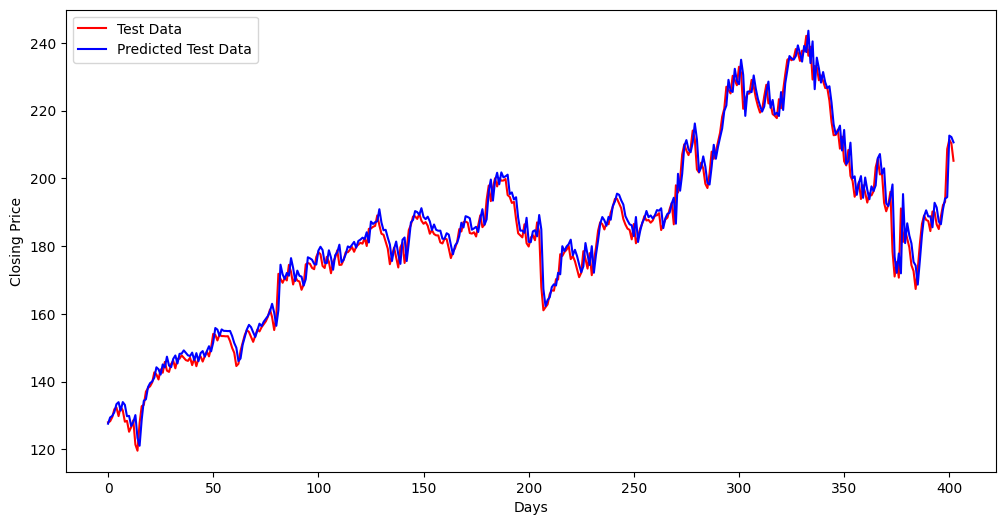

In [37]:
plt.figure(figsize = (12, 6))
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.plot(y_test, 'r', label = 'Test Data')
plt.plot(y_predict_test, 'b', label = 'Predicted Test Data')
plt.legend()

## 12.0 Evaluating the new model

In [38]:
mse = mean_squared_error(y_test, y_predict_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict_test)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE)", rmse)
print("R-Squared (R2): ", r2)

Mean Squared Error (MSE):  15.231784341609265
Root Mean Squared Error (RMSE) 3.9027918650126945
R-Squared (R2):  0.977585095521307


## 13.0 Saving the model

In [39]:
model.save('stock_prediction_model.keras')